In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

***DEFINIÇÂO:*** A *distribuição empírica* $\hat{F}$ é uma função de distribuição acumulada onde colocamos o peso de cada observação como 1/n.

$$
\hat{F}_n(x) = \frac{1}{n} \sum_{i=1}^{n} I(X_{i} \leq x) 
$$

onde:

$$
I(X_{i} \leq x) = \begin{cases} 1 \ se \  X_{i} \leq x \\ 0 \ se \ X_{i} > x \end{cases}
$$

OBS: O plot do gráfico está improvisado e o exemplo é para a exponencial.

<BarContainer object of 1000 artists>

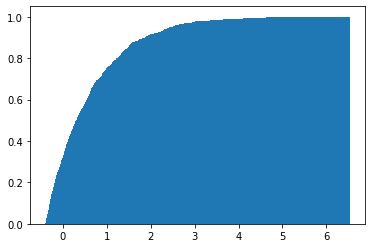

In [64]:
x = np.random.exponential(1, 1000)

p = np.zeros(len(x))

for i in np.unique(x):
    p[x == i] = np.sum(np.int0(x <= i))/len(x)

plt.bar(x, p)

***TEOREMA (Glivenko–Cantelli):*** $sup_{x} |\hat{F}_n(x) - F(x)| \rightarrow^{a.s.} 0$

Veja o exemplo para a normal padrão.

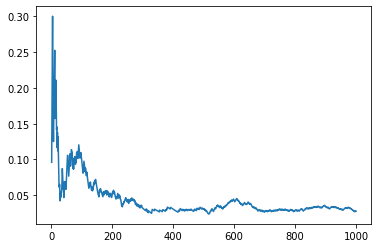

In [86]:
x = [0]
M = [None]
for j in np.arange(1000):
    x = np.append(x, np.random.normal(0, 1, 1))
    p = np.zeros(len(x))
    for i in np.unique(x):
        p[x == i] = np.sum(np.int0(x <= i))/len(x)
    M = np.append(M, max(abs(sc.norm.cdf(x) - p)))

plt.plot(M)

Bootstrap é um método para descobrir a variância de uma estatística $T = g(X_1, ..., X_n)$. O algorítimo é o seguinte:

1. Aleatorize uma subamostra com reposição de tamanho n
2. Compute $T = g(X_1, ..., X_n)$
3. Repita os passos 1 e 2 B vezes e pegue $T_1,...,T_B$
4. Compute a variância das estatística encontradas
$$
v_{boots} = \frac{1}{B} \sum_{b_1}^{B}( T_b - \frac{1}{B} \sum_{r = 1}^{B} T_r )^2
$$

O que é mais importante, o tamanho n da subamostra ou quantas repetições B são feitas? Veja um exemplo em para o desvio padrão de uma normal de média 2 e desvio padrão 5. Na primeira parte do código o looping é feito com vários tamanhos diferentes e no segundo a subamostra é escolhida em vários tamanhos digerentes.

In [185]:
x = np.random.normal(2,5,1000)

boots = []
Media = []
Desvio = []

for j in np.arange(100):
    boots = []
    for i in np.arange(j*100):
        boots = np.append(boots, np.std(np.random.choice(x, size = 50)))
    
    Media = np.append(Media, np.mean(boots))
    Desvio = np.append(Desvio, np.std(boots))

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


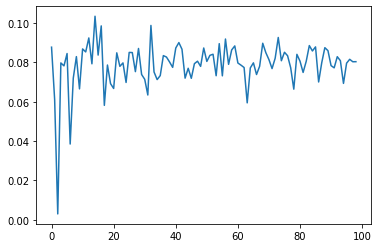

In [186]:
plt.plot(abs(Media[1:] - 5))

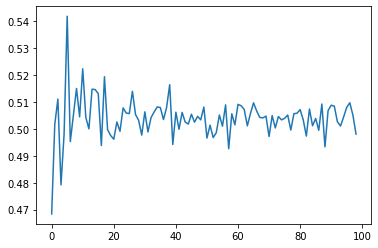

In [188]:
plt.plot(Desvio[1:])

In [179]:
x = np.random.normal(2,5,1000)

boots = []
Media = []
Desvio = []

for j in np.arange(100):
    boots = []
    for i in np.arange(1000):
        boots = np.append(boots, np.std(np.random.choice(x, size = j*20)))
    
    Media = np.append(Media, np.mean(boots))
    Desvio = np.append(Desvio, np.std(boots))

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


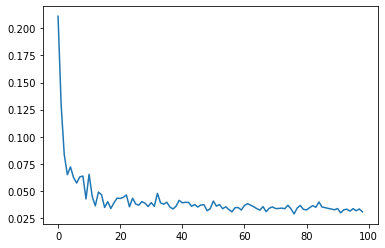

In [183]:
plt.plot(abs(Media[1:] - 5))

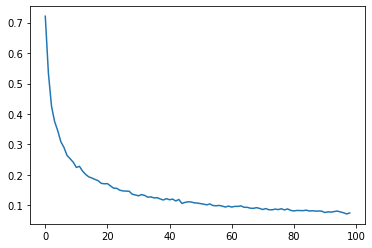

In [184]:
plt.plot(Desvio[1:])